In [1]:
import pandas as pd

In [2]:
ipl_auction_df=pd.read_csv('IPL IMB381IPL2013.csv')

In [3]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [4]:
ipl_auction_df.iloc[0:5,11:20]

,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS
0,0.0,0,0,0,0.00,0.00,0,307,15
1,37.6,0,0,0,0.00,0.00,0,29,0
2,32.9,0,167,39,18.56,121.01,5,1059,29
3,36.8,0,58,11,5.80,76.32,0,1125,49
4,0.0,0,1317,71,32.93,120.71,28,0,0


In [5]:
x_features=ipl_auction_df.columns
x_features=['AGE','COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

In [6]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [7]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [8]:
categorical_features=['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [9]:
ipl_auction_encoded_df=pd.get_dummies(ipl_auction_df[x_features],columns=categorical_features,drop_first=True)

In [10]:
ipl_auction_encoded_df.head(2)

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
x_features=ipl_auction_encoded_df.columns

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x = sm.add_constant(ipl_auction_encoded_df)
y = ipl_auction_df['SOLD PRICE']
train_x,test_x,train_y,test_y= train_test_split(x,y,train_size=0.8,random_state=42)

C:\Users\hp user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\hp user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
ipl_model_l=sm.OLS(train_y,train_x).fit()
ipl_model_l.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2020-01-21 08:12        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [14]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(x):
    x_matrix = x.as_matrix()
    vif = [ variance_inflation_factor(x_matrix,i) for i in range(x_matrix.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['column']=x.columns
    vif_factors['VIF'] = vif
    return vif_factors


In [15]:
vif_factors = get_vif_factors(x[x_features])

C:\Users\hp user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [16]:
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [17]:
columns_with_large_vif = vif_factors[vif_factors.VIF>4].column

Text(0.5, 1.0, 'Correlation_Heatmap')

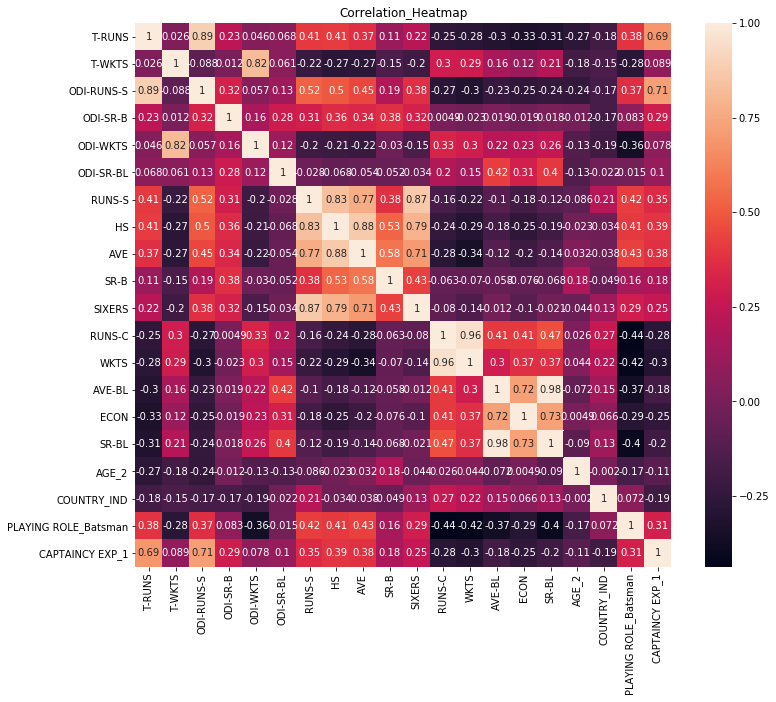

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.figure(figsize=(12,10))
sb.heatmap(x[columns_with_large_vif].corr(),annot=True)
plt.title('Correlation_Heatmap')

In [19]:
r=['T-RUNS','T-WKTS','RUNS-S','HS','AVE','RUNS-C','SR-B','AVE-BL','ECON','ODI-SR-B','ODI-RUNS-S','AGE_2','SR-BL']

In [20]:
x_new_features = list(set(x_features) - set(r))

In [21]:
get_vif_factors(x[x_new_features])

C:\Users\hp user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,column,VIF
0,COUNTRY_WI,1.194093
1,WKTS,2.883101
2,COUNTRY_ENG,1.131869
3,COUNTRY_SL,1.519752
4,SIXERS,2.397409
5,COUNTRY_BAN,1.094293
6,PLAYING ROLE_W. Keeper,1.900941
7,ODI-SR-BL,2.822148
8,COUNTRY_SA,1.416657
9,ODI-WKTS,2.742889


In [22]:
train_x=train_x[x_new_features]
ipl_model_2=sm.OLS(train_y,train_x).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2020-01-21 08:12   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [23]:
significant_vars=['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']
train_x=train_x[significant_vars]
ipl_model_3=sm.OLS(train_y,train_x).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2020-01-21 08:12 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [26]:
#Normality of residuals
def draw_pp_plot(model,title):
    probplot = sm.ProbPlot( model.resid )
    plt.figure (figsize = (8,6))
    probplot.ppplot( line = '45' )
    plt.title(title)
    plt.show()

<Figure size 576x432 with 0 Axes>

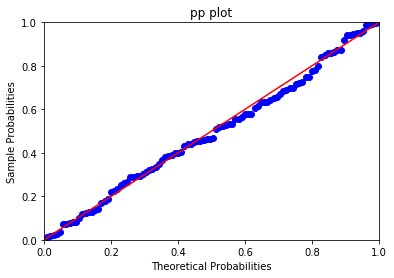

In [31]:
draw_pp_plot(ipl_model_3,'pp plot')

In [39]:
#Homoscadasticity
def get_standardized_values( vals):
    return (vals - vals.mean())/vals.std()
def plot_resid_fitted(fitted,resid,title):
    plt.scatter ( get_standardized_values(fitted), get_standardized_values(resid))
    plt.title(title)
    plt.xlabel('Standardized predicted values')
    plt.ylabel('standardized residual values')
    plt.show()

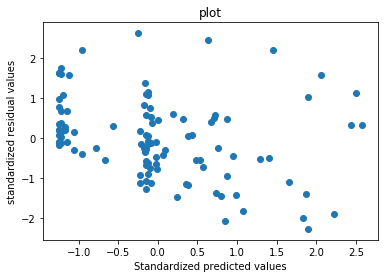

In [40]:
plot_resid_fitted(ipl_model_3.fittedvalues,ipl_model_3.resid,'plot')